In [1]:
# Libs
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
# filter data to drop NaN and count values (TERRA)
df_aod_terra = pd.read_csv('MOD043ktemporal_serie_manaus_aod2010_2020.csv')
df_aod_terra = df_aod_terra.dropna()

# filter data to drop NaN and count values (AQUA)
df_aod_aqua = pd.read_csv('MYD043ktemporal_serie_manaus_aod2010_2020.csv')
df_aod_aqua = df_aod_aqua.dropna()
print("TERRA:", len(df_aod_terra))
print("AQUA:", len(df_aod_aqua))

TERRA: 1427
AQUA: 1567


In [15]:
# Filter data to drop outliers (TERRA)
df_aod_terra = df_aod_terra[df_aod_terra["AOD"] <= 5]
df_aod_terra = df_aod_terra[df_aod_terra["AOD"] >= 0]
df_aod_terra['date'] = pd.to_datetime(df_aod_terra['date'])

# Filter data to drop outliers (AQUA)
df_aod_aqua = df_aod_aqua[df_aod_aqua["AOD"] <= 5]
df_aod_aqua = df_aod_aqua[df_aod_aqua["AOD"] >= 0]
df_aod_aqua['date'] = pd.to_datetime(df_aod_aqua['date'])


In [20]:
# Merge Terra and Aqua AOD data and calculate the mean between them
_df2010 = pd.merge(df_aod_aqua, df_aod_terra, on='date', how='outer').sort_values(by='date', ascending=True).fillna(0)
_df2010['mean'] = _df2010.apply(lambda row: row['AOD_x'] if row['AOD_y'] == 0 else
                                    row['AOD_y'] if row['AOD_x'] == 0 else
                                    (row['AOD_x'] + row['AOD_y']) / 2, axis=1)

# Drop columns "Unnamed: 0_x" and "Unnamed: 0_y"
_df2010 = _df2010.drop("Unnamed: 0_x", axis='columns')
_df2010 = _df2010.drop("Unnamed: 0_y", axis='columns')
_df2010

,date,AOD_x,AOD_y,mean
0,2010-01-06,0.135101,0.179625,0.157363
1,2010-01-10,0.247000,0.472000,0.359500
2,2010-01-13,0.137000,0.000000,0.137000
1575,2010-01-14,0.000000,0.215000,0.215000
3,2010-01-18,0.416500,0.000000,0.416500
...,...,...,...,...
2156,2020-12-21,0.000000,0.381000,0.381000
1569,2020-12-23,0.302000,0.000000,0.302000
1572,2020-12-26,0.256667,0.000000,0.256667
1573,2020-12-28,0.397833,0.000000,0.397833


In [21]:
_df2010.to_csv('AOD_manaus_2010_2020_final.csv', index=False)

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'AOD 3 km'),
 Text(0.5, 1.0, 'Time Serie of AOD - Manaus')]

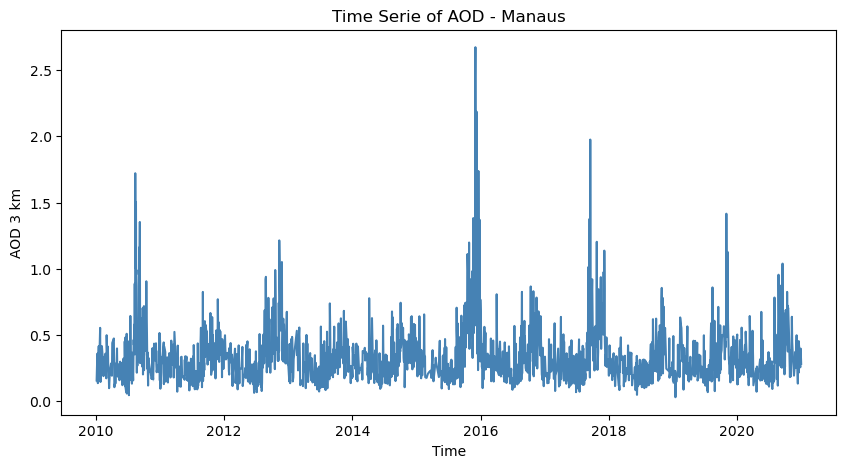

In [27]:
#Create seaborn lineplot to visualize AOD
fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(x='date', y='mean', 
                 data = _df2010, 
                 color='steelblue')

#specfiy axis labels
ax.set(xlabel='Time',
       ylabel='AOD 3 km',
       title='Time Serie of AOD - Manaus')